In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: WFC-PL
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1206 
Tsesting data: 748 


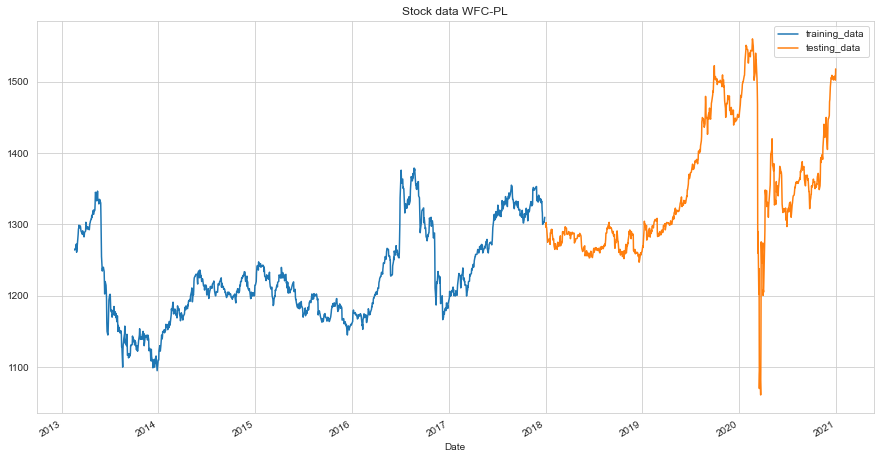

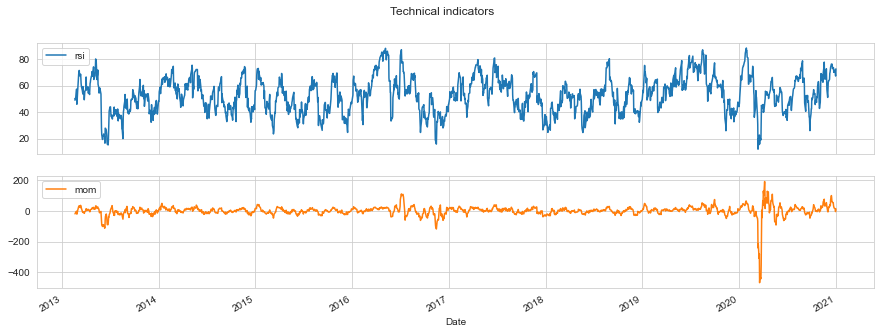

In [2]:
stock_name = 'wfc-pl'.upper()
industry = 'Financial Services'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1033.25, duration: 0:00:00.431094
episode: 2/2000, episode end value: 1020.05, duration: 0:00:00.436100
episode: 3/2000, episode end value: 1030.19, duration: 0:00:00.367083
episode: 4/2000, episode end value: 1024.20, duration: 0:00:00.429098
episode: 5/2000, episode end value: 1022.16, duration: 0:00:00.391086
episode: 6/2000, episode end value: 1038.90, duration: 0:00:00.308070
episode: 7/2000, episode end value: 1034.00, duration: 0:00:00.341079
episode: 8/2000, episode end value: 1029.84, duration: 0:00:00.388089
episode: 9/2000, episode end value: 1025.87, duration: 0:00:00.480109
episode: 10/2000, episode end value: 1024.51, duration: 0:00:00.449100
episode: 11/2000, episode end value: 1026.87, duration: 0:00:00.392085
episode: 12/2000, episode end value: 1027.04, duration: 0:00:00.327080
episode: 13/2000, episode end value: 1026.03, duration: 0:00:00.405090
episode: 14/2000, episode end value: 1029.94, duration: 0:00:00.407093
episode: 15/200

episode: 117/2000, episode end value: 1032.45, duration: 0:00:00.479110
episode: 118/2000, episode end value: 1027.19, duration: 0:00:00.503114
episode: 119/2000, episode end value: 1027.11, duration: 0:00:00.420094
episode: 120/2000, episode end value: 1024.36, duration: 0:00:00.494112
episode: 121/2000, episode end value: 1026.21, duration: 0:00:00.509117
episode: 122/2000, episode end value: 1029.15, duration: 0:00:00.493116
episode: 123/2000, episode end value: 1023.95, duration: 0:00:00.472103
episode: 124/2000, episode end value: 1026.25, duration: 0:00:00.447104
episode: 125/2000, episode end value: 1024.83, duration: 0:00:00.443100
episode: 126/2000, episode end value: 1026.75, duration: 0:00:00.472105
episode: 127/2000, episode end value: 1025.66, duration: 0:00:00.453084
episode: 128/2000, episode end value: 1028.20, duration: 0:00:00.481109
episode: 129/2000, episode end value: 1024.34, duration: 0:00:00.475111
episode: 130/2000, episode end value: 1027.75, duration: 0:00:00

episode: 231/2000, episode end value: 1025.18, duration: 0:00:00.438100
episode: 232/2000, episode end value: 1032.14, duration: 0:00:00.410095
episode: 233/2000, episode end value: 1025.71, duration: 0:00:00.555126
episode: 234/2000, episode end value: 1026.74, duration: 0:00:00.442101
episode: 235/2000, episode end value: 1024.49, duration: 0:00:00.494109
episode: 236/2000, episode end value: 1023.03, duration: 0:00:00.464107
episode: 237/2000, episode end value: 1026.78, duration: 0:00:00.472997
episode: 238/2000, episode end value: 1026.01, duration: 0:00:00.432662
episode: 239/2000, episode end value: 1028.58, duration: 0:00:00.531123
episode: 240/2000, episode end value: 1025.85, duration: 0:00:00.553128
episode: 241/2000, episode end value: 1023.15, duration: 0:00:00.453098
episode: 242/2000, episode end value: 1029.65, duration: 0:00:00.510076
episode: 243/2000, episode end value: 1025.87, duration: 0:00:00.413778
episode: 244/2000, episode end value: 1022.22, duration: 0:00:00

episode: 345/2000, episode end value: 1028.24, duration: 0:00:00.462105
episode: 346/2000, episode end value: 1023.25, duration: 0:00:00.417093
episode: 347/2000, episode end value: 1024.60, duration: 0:00:00.415097
episode: 348/2000, episode end value: 1026.95, duration: 0:00:00.421098
episode: 349/2000, episode end value: 1023.57, duration: 0:00:00.503110
episode: 350/2000, episode end value: 1025.06, duration: 0:00:00.505114
episode: 351/2000, episode end value: 1025.87, duration: 0:00:00.602137
episode: 352/2000, episode end value: 1025.09, duration: 0:00:00.547126
episode: 353/2000, episode end value: 1025.70, duration: 0:00:00.516116
episode: 354/2000, episode end value: 1024.10, duration: 0:00:00.505111
episode: 355/2000, episode end value: 1028.48, duration: 0:00:00.523128
episode: 356/2000, episode end value: 1026.22, duration: 0:00:00.589132
episode: 357/2000, episode end value: 1024.50, duration: 0:00:00.565129
episode: 358/2000, episode end value: 1030.20, duration: 0:00:00

episode: 459/2000, episode end value: 1023.39, duration: 0:00:00.451102
episode: 460/2000, episode end value: 1023.54, duration: 0:00:00.486117
episode: 461/2000, episode end value: 1021.92, duration: 0:00:00.477113
episode: 462/2000, episode end value: 1023.70, duration: 0:00:00.472103
episode: 463/2000, episode end value: 1028.84, duration: 0:00:00.401091
episode: 464/2000, episode end value: 1023.23, duration: 0:00:00.395091
episode: 465/2000, episode end value: 1027.91, duration: 0:00:00.496115
episode: 466/2000, episode end value: 1025.54, duration: 0:00:00.487116
episode: 467/2000, episode end value: 1024.30, duration: 0:00:00.457130
episode: 468/2000, episode end value: 1023.62, duration: 0:00:00.474650
episode: 469/2000, episode end value: 1025.51, duration: 0:00:00.497107
episode: 470/2000, episode end value: 1023.68, duration: 0:00:00.491112
episode: 471/2000, episode end value: 1034.69, duration: 0:00:00.466320
episode: 472/2000, episode end value: 1025.45, duration: 0:00:00

episode: 573/2000, episode end value: 1022.85, duration: 0:00:00.433991
episode: 574/2000, episode end value: 1025.47, duration: 0:00:00.581327
episode: 575/2000, episode end value: 1025.08, duration: 0:00:00.496116
episode: 576/2000, episode end value: 1023.24, duration: 0:00:00.460101
episode: 577/2000, episode end value: 1023.93, duration: 0:00:00.402089
episode: 578/2000, episode end value: 1025.04, duration: 0:00:00.438098
episode: 579/2000, episode end value: 1025.89, duration: 0:00:00.517116
episode: 580/2000, episode end value: 1022.25, duration: 0:00:00.537121
episode: 581/2000, episode end value: 1024.19, duration: 0:00:00.569127
episode: 582/2000, episode end value: 1022.61, duration: 0:00:00.500114
episode: 583/2000, episode end value: 1026.83, duration: 0:00:00.453103
episode: 584/2000, episode end value: 1022.32, duration: 0:00:00.452106
episode: 585/2000, episode end value: 1026.50, duration: 0:00:00.410095
episode: 586/2000, episode end value: 1022.73, duration: 0:00:00

episode: 687/2000, episode end value: 1023.83, duration: 0:00:00.530121
episode: 688/2000, episode end value: 1022.76, duration: 0:00:00.490110
episode: 689/2000, episode end value: 1025.87, duration: 0:00:00.444104
episode: 690/2000, episode end value: 1028.83, duration: 0:00:00.449104
episode: 691/2000, episode end value: 1024.39, duration: 0:00:00.449098
episode: 692/2000, episode end value: 1022.26, duration: 0:00:00.425103
episode: 693/2000, episode end value: 1024.29, duration: 0:00:00.404086
episode: 694/2000, episode end value: 1024.21, duration: 0:00:00.439099
episode: 695/2000, episode end value: 1027.29, duration: 0:00:00.437104
episode: 696/2000, episode end value: 1024.77, duration: 0:00:00.460094
episode: 697/2000, episode end value: 1026.71, duration: 0:00:00.474107
episode: 698/2000, episode end value: 1025.64, duration: 0:00:00.530125
episode: 699/2000, episode end value: 1026.30, duration: 0:00:00.493112
episode: 700/2000, episode end value: 1023.20, duration: 0:00:00

episode: 801/2000, episode end value: 1024.25, duration: 0:00:00.450104
episode: 802/2000, episode end value: 1024.68, duration: 0:00:00.484109
episode: 803/2000, episode end value: 1024.79, duration: 0:00:00.441098
episode: 804/2000, episode end value: 1027.20, duration: 0:00:00.469101
episode: 805/2000, episode end value: 1026.14, duration: 0:00:00.525120
episode: 806/2000, episode end value: 1026.63, duration: 0:00:00.491109
episode: 807/2000, episode end value: 1024.16, duration: 0:00:00.482108
episode: 808/2000, episode end value: 1029.10, duration: 0:00:00.407093
episode: 809/2000, episode end value: 1024.84, duration: 0:00:00.537701
episode: 810/2000, episode end value: 1018.95, duration: 0:00:00.477107
episode: 811/2000, episode end value: 1022.31, duration: 0:00:00.452109
episode: 812/2000, episode end value: 1022.46, duration: 0:00:00.491118
episode: 813/2000, episode end value: 1033.97, duration: 0:00:00.483682
episode: 814/2000, episode end value: 1022.77, duration: 0:00:00

episode: 915/2000, episode end value: 1029.28, duration: 0:00:00.400765
episode: 916/2000, episode end value: 1024.79, duration: 0:00:00.463105
episode: 917/2000, episode end value: 1025.12, duration: 0:00:00.530123
episode: 918/2000, episode end value: 1026.77, duration: 0:00:00.525326
episode: 919/2000, episode end value: 1020.29, duration: 0:00:00.411500
episode: 920/2000, episode end value: 1022.59, duration: 0:00:00.438884
episode: 921/2000, episode end value: 1024.94, duration: 0:00:00.406095
episode: 922/2000, episode end value: 1022.57, duration: 0:00:00.503113
episode: 923/2000, episode end value: 1024.30, duration: 0:00:00.456103
episode: 924/2000, episode end value: 1034.18, duration: 0:00:00.518114
episode: 925/2000, episode end value: 1026.23, duration: 0:00:00.498112
episode: 926/2000, episode end value: 1027.63, duration: 0:00:00.509117
episode: 927/2000, episode end value: 1023.53, duration: 0:00:00.517115
episode: 928/2000, episode end value: 1022.60, duration: 0:00:00

episode: 1029/2000, episode end value: 1026.48, duration: 0:00:00.518117
episode: 1030/2000, episode end value: 1029.15, duration: 0:00:00.553124
episode: 1031/2000, episode end value: 1025.44, duration: 0:00:00.467105
episode: 1032/2000, episode end value: 1030.76, duration: 0:00:00.543127
episode: 1033/2000, episode end value: 1025.22, duration: 0:00:00.528120
episode: 1034/2000, episode end value: 1024.29, duration: 0:00:00.437096
episode: 1035/2000, episode end value: 1027.39, duration: 0:00:00.461748
episode: 1036/2000, episode end value: 1027.53, duration: 0:00:00.401031
episode: 1037/2000, episode end value: 1033.10, duration: 0:00:00.441992
episode: 1038/2000, episode end value: 1024.31, duration: 0:00:00.525337
episode: 1039/2000, episode end value: 1026.26, duration: 0:00:00.552125
episode: 1040/2000, episode end value: 1023.35, duration: 0:00:00.465103
episode: 1041/2000, episode end value: 1034.35, duration: 0:00:00.430097
episode: 1042/2000, episode end value: 1025.33, dur

episode: 1142/2000, episode end value: 1028.58, duration: 0:00:00.479107
episode: 1143/2000, episode end value: 1033.53, duration: 0:00:00.496114
episode: 1144/2000, episode end value: 1024.54, duration: 0:00:00.569130
episode: 1145/2000, episode end value: 1026.89, duration: 0:00:00.587138
episode: 1146/2000, episode end value: 1022.84, duration: 0:00:00.450683
episode: 1147/2000, episode end value: 1026.82, duration: 0:00:00.450015
episode: 1148/2000, episode end value: 1025.06, duration: 0:00:00.468515
episode: 1149/2000, episode end value: 1022.60, duration: 0:00:00.411090
episode: 1150/2000, episode end value: 1028.63, duration: 0:00:00.358081
episode: 1151/2000, episode end value: 1025.96, duration: 0:00:00.473107
episode: 1152/2000, episode end value: 1024.25, duration: 0:00:00.423098
episode: 1153/2000, episode end value: 1032.32, duration: 0:00:00.433096
episode: 1154/2000, episode end value: 1023.83, duration: 0:00:00.414096
episode: 1155/2000, episode end value: 1032.56, dur

episode: 1255/2000, episode end value: 1024.34, duration: 0:00:00.466329
episode: 1256/2000, episode end value: 1024.41, duration: 0:00:00.415092
episode: 1257/2000, episode end value: 1021.62, duration: 0:00:00.446103
episode: 1258/2000, episode end value: 1026.17, duration: 0:00:00.545123
episode: 1259/2000, episode end value: 1019.02, duration: 0:00:00.482112
episode: 1260/2000, episode end value: 1023.98, duration: 0:00:00.459103
episode: 1261/2000, episode end value: 1024.34, duration: 0:00:00.494112
episode: 1262/2000, episode end value: 1021.74, duration: 0:00:00.502114
episode: 1263/2000, episode end value: 1022.55, duration: 0:00:00.449105
episode: 1264/2000, episode end value: 1025.13, duration: 0:00:00.423093
episode: 1265/2000, episode end value: 1022.76, duration: 0:00:00.430097
episode: 1266/2000, episode end value: 1024.04, duration: 0:00:00.498117
episode: 1267/2000, episode end value: 1025.51, duration: 0:00:00.400084
episode: 1268/2000, episode end value: 1027.26, dur

episode: 1368/2000, episode end value: 1018.87, duration: 0:00:00.419094
episode: 1369/2000, episode end value: 1027.15, duration: 0:00:00.435097
episode: 1370/2000, episode end value: 1021.33, duration: 0:00:00.406090
episode: 1371/2000, episode end value: 1026.93, duration: 0:00:00.419094
episode: 1372/2000, episode end value: 1019.55, duration: 0:00:00.451103
episode: 1373/2000, episode end value: 1025.85, duration: 0:00:00.413095
episode: 1374/2000, episode end value: 1023.31, duration: 0:00:00.482691
episode: 1375/2000, episode end value: 1024.62, duration: 0:00:00.515068
episode: 1376/2000, episode end value: 1026.80, duration: 0:00:00.475112
episode: 1377/2000, episode end value: 1022.94, duration: 0:00:00.529117
episode: 1378/2000, episode end value: 1024.88, duration: 0:00:00.560666
episode: 1379/2000, episode end value: 1024.21, duration: 0:00:00.451088
episode: 1380/2000, episode end value: 1026.66, duration: 0:00:00.488105
episode: 1381/2000, episode end value: 1018.85, dur

episode: 1481/2000, episode end value: 1024.64, duration: 0:00:00.432095
episode: 1482/2000, episode end value: 1027.84, duration: 0:00:00.370082
episode: 1483/2000, episode end value: 1026.97, duration: 0:00:00.459106
episode: 1484/2000, episode end value: 1023.62, duration: 0:00:00.528122
episode: 1485/2000, episode end value: 1024.95, duration: 0:00:00.531119
episode: 1486/2000, episode end value: 1033.05, duration: 0:00:00.475105
episode: 1487/2000, episode end value: 1023.82, duration: 0:00:00.362081
episode: 1488/2000, episode end value: 1024.73, duration: 0:00:00.357083
episode: 1489/2000, episode end value: 1024.48, duration: 0:00:00.345077
episode: 1490/2000, episode end value: 1022.97, duration: 0:00:00.323073
episode: 1491/2000, episode end value: 1023.55, duration: 0:00:00.362083
episode: 1492/2000, episode end value: 1024.28, duration: 0:00:00.318072
episode: 1493/2000, episode end value: 1028.03, duration: 0:00:00.341078
episode: 1494/2000, episode end value: 1023.01, dur

episode: 1594/2000, episode end value: 1025.37, duration: 0:00:00.363084
episode: 1595/2000, episode end value: 1025.90, duration: 0:00:00.366077
episode: 1596/2000, episode end value: 1026.88, duration: 0:00:00.365084
episode: 1597/2000, episode end value: 1022.37, duration: 0:00:00.320070
episode: 1598/2000, episode end value: 1024.57, duration: 0:00:00.318071
episode: 1599/2000, episode end value: 1020.91, duration: 0:00:00.303074
episode: 1600/2000, episode end value: 1026.12, duration: 0:00:00.371078
episode: 1601/2000, episode end value: 1021.52, duration: 0:00:00.364083
episode: 1602/2000, episode end value: 1022.50, duration: 0:00:00.320075
episode: 1603/2000, episode end value: 1025.32, duration: 0:00:00.322073
episode: 1604/2000, episode end value: 1023.90, duration: 0:00:00.297064
episode: 1605/2000, episode end value: 1031.21, duration: 0:00:00.319070
episode: 1606/2000, episode end value: 1025.16, duration: 0:00:00.380085
episode: 1607/2000, episode end value: 1022.02, dur

episode: 1707/2000, episode end value: 1024.92, duration: 0:00:00.284068
episode: 1708/2000, episode end value: 1026.19, duration: 0:00:00.278063
episode: 1709/2000, episode end value: 1022.52, duration: 0:00:00.252055
episode: 1710/2000, episode end value: 1023.81, duration: 0:00:00.280065
episode: 1711/2000, episode end value: 1025.93, duration: 0:00:00.267058
episode: 1712/2000, episode end value: 1025.00, duration: 0:00:00.269059
episode: 1713/2000, episode end value: 1027.01, duration: 0:00:00.268061
episode: 1714/2000, episode end value: 1025.14, duration: 0:00:00.256056
episode: 1715/2000, episode end value: 1032.07, duration: 0:00:00.236056
episode: 1716/2000, episode end value: 1024.89, duration: 0:00:00.254071
episode: 1717/2000, episode end value: 1023.71, duration: 0:00:00.241041
episode: 1718/2000, episode end value: 1022.94, duration: 0:00:00.267061
episode: 1719/2000, episode end value: 1024.59, duration: 0:00:00.252074
episode: 1720/2000, episode end value: 1026.48, dur

episode: 1820/2000, episode end value: 1023.63, duration: 0:00:00.231056
episode: 1821/2000, episode end value: 1024.65, duration: 0:00:00.256058
episode: 1822/2000, episode end value: 1025.02, duration: 0:00:00.250059
episode: 1823/2000, episode end value: 1024.73, duration: 0:00:00.258059
episode: 1824/2000, episode end value: 1023.96, duration: 0:00:00.261059
episode: 1825/2000, episode end value: 1022.63, duration: 0:00:00.259056
episode: 1826/2000, episode end value: 1027.95, duration: 0:00:00.257063
episode: 1827/2000, episode end value: 1023.09, duration: 0:00:00.249051
episode: 1828/2000, episode end value: 1022.08, duration: 0:00:00.249056
episode: 1829/2000, episode end value: 1022.46, duration: 0:00:00.260059
episode: 1830/2000, episode end value: 1021.81, duration: 0:00:00.249057
episode: 1831/2000, episode end value: 1037.91, duration: 0:00:00.251057
episode: 1832/2000, episode end value: 1025.13, duration: 0:00:00.242054
episode: 1833/2000, episode end value: 1028.58, dur

episode: 1933/2000, episode end value: 1025.71, duration: 0:00:00.262059
episode: 1934/2000, episode end value: 1025.02, duration: 0:00:00.253058
episode: 1935/2000, episode end value: 1023.70, duration: 0:00:00.232051
episode: 1936/2000, episode end value: 1023.16, duration: 0:00:00.242057
episode: 1937/2000, episode end value: 1025.45, duration: 0:00:00.254571
episode: 1938/2000, episode end value: 1024.18, duration: 0:00:00.227053
episode: 1939/2000, episode end value: 1025.12, duration: 0:00:00.213065
episode: 1940/2000, episode end value: 1024.40, duration: 0:00:00.217041
episode: 1941/2000, episode end value: 1028.12, duration: 0:00:00.227044
episode: 1942/2000, episode end value: 1020.85, duration: 0:00:00.249048
episode: 1943/2000, episode end value: 1023.14, duration: 0:00:00.268070
episode: 1944/2000, episode end value: 1022.91, duration: 0:00:00.237063
episode: 1945/2000, episode end value: 1022.68, duration: 0:00:00.242057
episode: 1946/2000, episode end value: 1022.43, dur

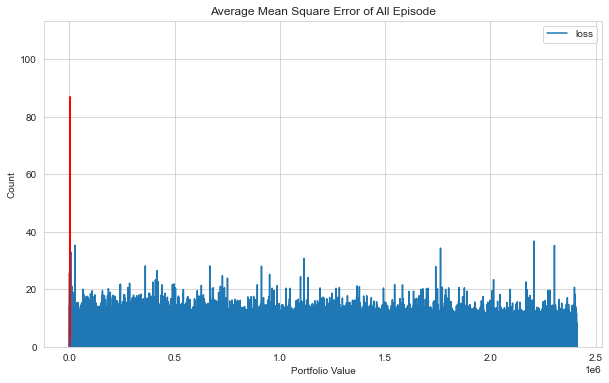

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

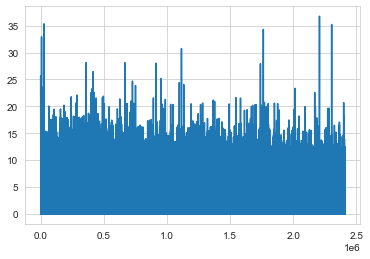

In [5]:
plt.plot(agent.model.losses)

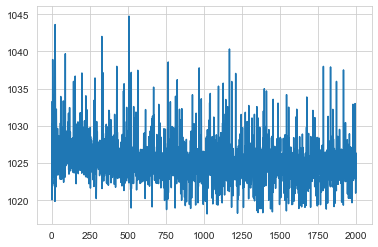

In [6]:
plt.plot(portfolio_value)

episode end value: 1068.34, duration: 0:00:00.102034
Sell: 418 times, Buy: 307 times


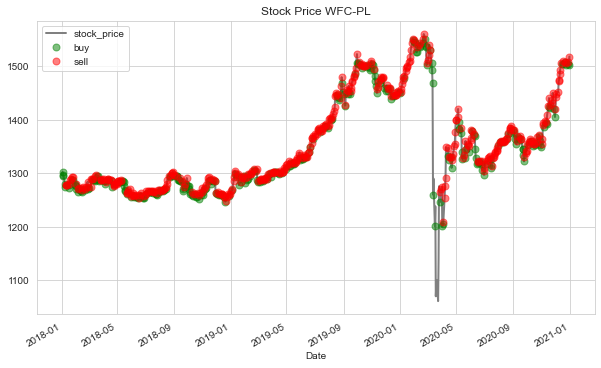

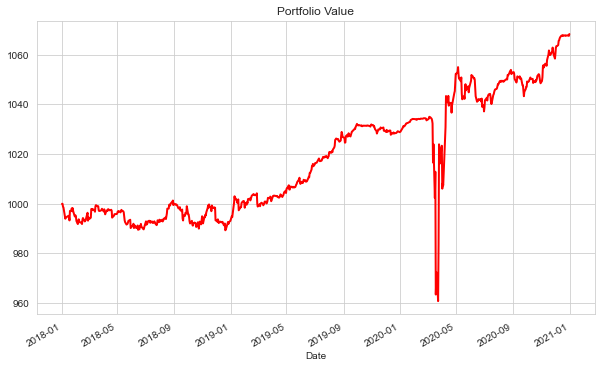

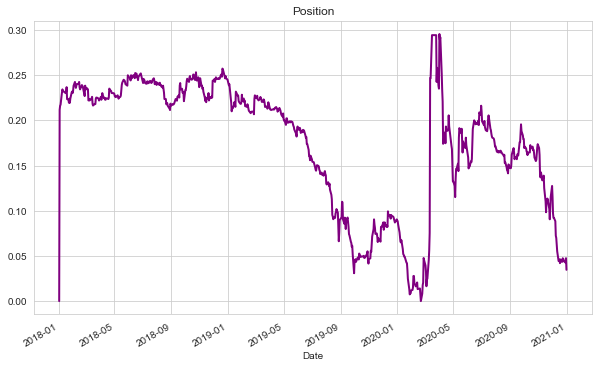

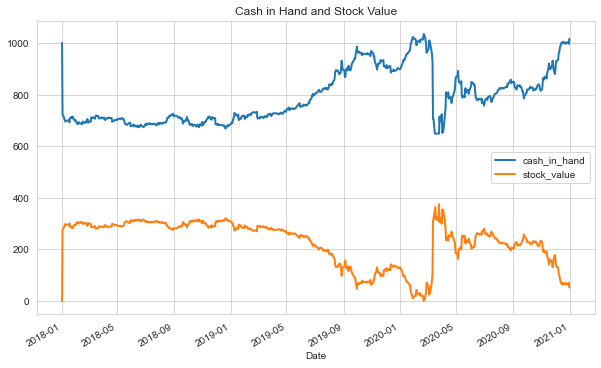

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: WFC-PL
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 2.25 %
Volatility: 0.0497
shape ratio: 0.2320
Maximun drawdown: -7.17 %
Calmar ratio: 0.3141
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 5.47 %
Volatility (benchmark): 0.1788
shape ratio: 0.2441
Maximun drawdown: -31.99 %
Calmar ratio (benchmark): 0.1709


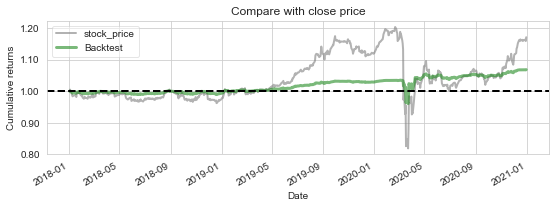

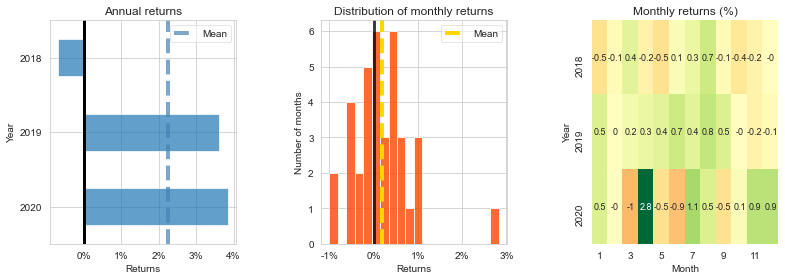

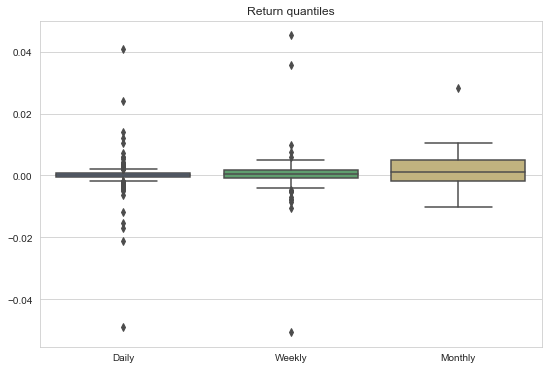

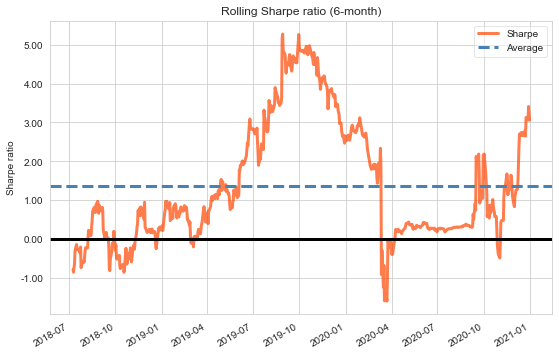

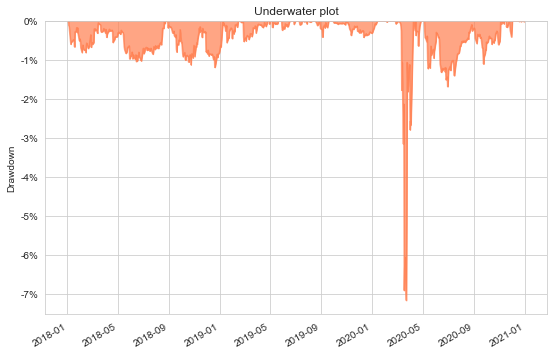

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')